<a href="https://colab.research.google.com/github/Rneron/Python/blob/main/ModeloRBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Este programa tem como objetivo estimar do número de PageViews nos dias 12 e 13 de Setembro, para isso utilizei modelos de suavização exponencial sendo eles: Algoritmo de suavização Simples,Holt-Winters (aditivo e multiplicativo) e Pegels (aditivo e multiplicativo).**
 **Os texto em itálico PageViews utilizado para a construção dos modelos foram retirados da fonte de dados "Analytics_GZH_GA4_PRD" e o período utilizado foi 16/07/2023 até 06/09/2023**

**IMPORTANDO BIBLIOTECAS**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

from sklearn.metrics import mean_absolute_error,mean_squared_error



**IMPORTANDO OS DADOS**

In [26]:
dados = pd.read_csv('/content/drive/MyDrive/Python/tabelas/Dados.xlsx - Planilha1 (2).csv',encoding='iso-8859-1',header=None,names=["Data","PageViews"])

**BREVE ANÁLISE DOS DADOS**

In [27]:
dados.head(10)

,Data,PageViews
0,1\01\2023,824605
1,2\01\2023,1064369
2,3\01\2023,1173812
3,4\01\2023,1243996
4,5\01\2023,1039252
5,6\01\2023,1093870
6,7\01\2023,853372
7,8\01\2023,795653
8,9\01\2023,978525
9,10\01\2023,954873


**GERANDO UMA COLUNA DE DATAS**

In [28]:
data_inicial = '01-01-2023'
data_final = '06-09-2023'
datas = []

# Loop para gerar as datas de dia em dia
data_atual = pd.to_datetime(data_inicial, format='%d-%m-%Y')
data_fim = pd.to_datetime(data_final, format='%d-%m-%Y')

while data_atual <= data_fim:
    datas.append(data_atual)
    data_atual += pd.DateOffset(days=1)

# DataFrame com as datas
df1 = pd.DataFrame({'data': datas})

# DataFrame resultante
print(df1)


          data
0   2023-01-01
1   2023-01-02
2   2023-01-03
3   2023-01-04
4   2023-01-05
..         ...
244 2023-09-02
245 2023-09-03
246 2023-09-04
247 2023-09-05
248 2023-09-06

[249 rows x 1 columns]


**EXCLUINDO A COLUNA Data POR NÃO ESTAR NO FORMATO DESEJADO**

In [29]:
del dados["Data"]

**JUNTANDO O DATA FRAME COM AS DATAS CRIADAS E AS PAGEVIEWS**

In [30]:
df = pd.concat([df1,dados], axis=1)


**TRANSFORMANDO A COLUNA "data" PARA O FORMATO DE DATA**

In [8]:
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')


**ESCOLHENDO OS PAGEVIEWS APENAS DO GA4**

In [9]:
ga4 = df[196:len(df)]

<Axes: >

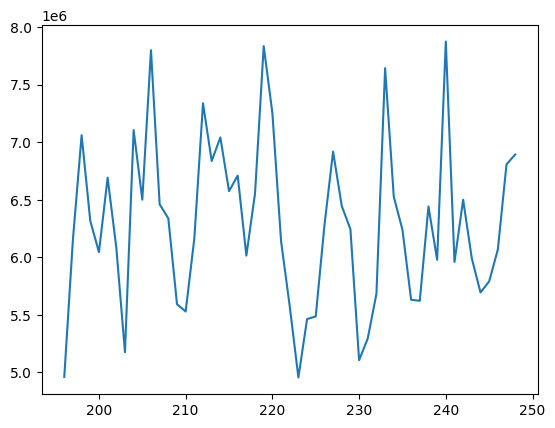

In [10]:
ga4.PageViews.plot()


In [11]:
ga4.index = pd.to_datetime(ga4['data'], format='%d/%m/%Y')

**TESTE DE DICKEY-FULLER PARA VERIFICAR SE A SÉRIE É ESTACIONÁRIA**

In [16]:
adftest = adfuller(ga4['PageViews'], autolag='AIC', regression='ct')
print("ADF-Estatística:", adftest[0])
print("P-Valor:", adftest[1])
print("Valores Críticos:", adftest[4])
print("Como o P-Valor é menor que 0.05 então rejeitamos a hipótese nula e concluímos que a série é estacionária")

ADF-Estatística: -5.6099275391633725
P-Valor: 1.391993204734239e-05
Valores Críticos: {'1%': -4.15227644, '5%': -3.5022753919999996, '10%': -3.1805110400000003}


**A partir daqui iremos construir os modelos para a série estacionária**

**Modelo de Suavização Simples**


In [ ]:
modelo = SimpleExpSmoothing(ga4.PageViews).fit()
previsao = modelo.predict(start='2023-9-7',end='2023-9-15')

**Modelo de Suavização de Holt-Winters aditivo**

In [ ]:

modelo_2=ExponentialSmoothing(ga4.PageViews,seasonal='add',trend='add').fit()
previsao_2 = modelo_2.predict(start='2023-9-7',end='2023-9-15')


**Modelo de Suavização de Holt-Winters multiplicativo**

In [19]:

modelo_3 = ExponentialSmoothing(ga4.PageViews,seasonal='mul',trend='add').fit()
previsao_3 = modelo_3.predict(start='2023-9-7',end='2023-9-15')



**Modelo de Suavização Pegels aditivo**

In [20]:
modelo_4 = ExponentialSmoothing(ga4.PageViews,seasonal='add',trend='mul').fit()
previsao_4 = modelo_4.predict(start='2023-9-7',end='2023-9-15')

**Modelo de Suavização Pegels multiplicativo**

In [21]:
modelo_5 = ExponentialSmoothing(ga4.PageViews,seasonal='mul',trend='mul').fit()
previsao_5 = modelo_5.predict(start='2023-9-7',end='2023-9-15')

In [ ]:

print('-Erro médio absoluto do Algoritmo de Suavização Simples :',
      round(mean_absolute_error(ga4.PageViews,modelo.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Simples :',
      round(mean_squared_error(ga4.PageViews,modelo.fittedvalues)**0.5,3))

print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Holt-Winters aditivo :',
      round(mean_absolute_error(ga4.PageViews,modelo_2.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Holt-Winters aditivo :',
      round(mean_squared_error(ga4.PageViews,modelo_2.fittedvalues)**0.5,3))

print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Holt-Winters multiplicativo :',
      round(mean_absolute_error(ga4.PageViews,modelo_3.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Holt-Winters multiplicativo :',
      round(mean_squared_error(ga4.PageViews,modelo_3.fittedvalues)**0.5,3))


print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Pegels aditivo :',
      round(mean_absolute_error(ga4.PageViews,modelo_4.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Pegels aditivo :',
      round(mean_squared_error(ga4.PageViews,modelo_4.fittedvalues)**0.5,3))

print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Pegels multiplicativo:',
      round(mean_absolute_error(ga4.PageViews,modelo_5.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Pegels multiplicativo:',
      round(mean_squared_error(ga4.PageViews,modelo_5.fittedvalues)**0.5,3))

-Erro médio absoluto do Algoritmo de Suavização Simples : 619706.974
-Raiz do erro médio quadrado do Algoritmo de Suavização Simples : 799041.127
                                                                                                                                                                                                                                                              
-Erro médio absoluto do Algoritmo de Suavização Holt-Winters aditivo : 411747.81
-Raiz do erro médio quadrado do Algoritmo de Suavização Holt-Winters aditivo : 525076.202
                                                                                                                                                                                                                                                              
-Erro médio absoluto do Algoritmo de Suavização Holt-Winters multiplicativo : 412794.582
-Raiz do erro médio quadrado do Algoritmo de Suavização Holt-Winters multiplicativo 

**Vemos que o modelos 2 e 3 foram aqueles que se sairam melhor por possuir os menores erros, dessa forma iremos usá-los pra fazer as predições e comparar qual se sai melhor através do AIC**

In [ ]:
modelo_2.summary()

Dep. Variable:,PageViews,No. Observations:,53
Model:,ExponentialSmoothing,SSE,14612365932851.201
Optimized:,True,AIC,1418.158
Trend:,Additive,BIC,1439.831
Seasonal:,Additive,AICC,1427.491
Seasonal Periods:,7,Date:,"Thu, 19 Oct 2023"
Box-Cox:,False,Time:,16:52:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1817857,alpha,True
smoothing_trend,0.0302976,beta,True


In [24]:
modelo_3.summary()

Dep. Variable:,PageViews,No. Observations:,53
Model:,ExponentialSmoothing,SSE,14540358382944.586
Optimized:,True,AIC,1417.896
Trend:,Additive,BIC,1439.569
Seasonal:,Multiplicative,AICC,1427.229
Seasonal Periods:,7,Date:,"Thu, 19 Oct 2023"
Box-Cox:,False,Time:,19:03:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1817857,alpha,True
smoothing_trend,0.0302976,beta,True


**Notamos que o modelo 3 possui tanto um AIC menor quanto um BIC, dessa forma iremos usá-lo para fazer as predições**

**AJUSTE DO MODELO**

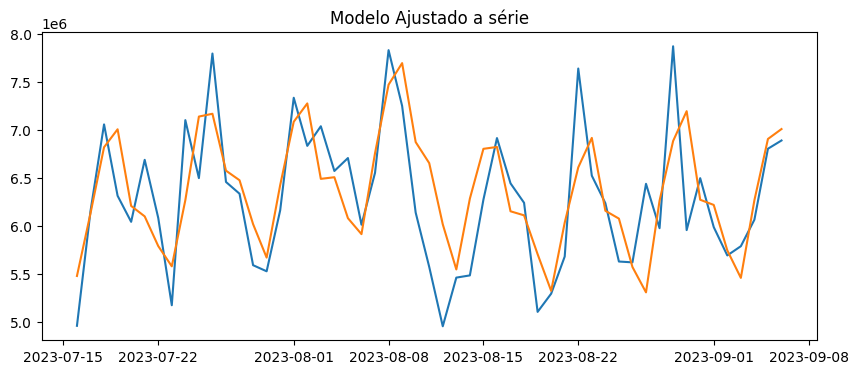

In [22]:
plt.figure(figsize=(10,4))
plt.plot(ga4.PageViews)
plt.plot(modelo_3.fittedvalues)
plt.title('Modelo Ajustado a série')

plt.show()


**PREVISÃO DOS DIAS 7 A 15**

2023-09-07    6.288430e+06
2023-09-08    6.192161e+06
2023-09-09    5.758810e+06
2023-09-10    5.480371e+06
2023-09-11    6.222506e+06
2023-09-12    6.896360e+06
2023-09-13    7.017762e+06
2023-09-14    6.314277e+06
2023-09-15    6.217597e+06
Freq: D, dtype: float64

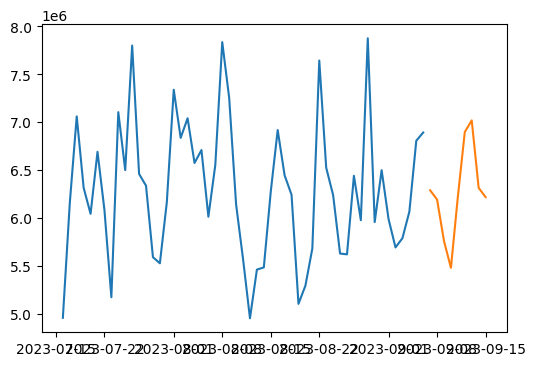

In [23]:
plt.figure(figsize=(10,4))
plt.plot(ga4.PageViews)
plt.plot(previsao_3)
previsao_3

**ANÁLISE DOS RESÍDUOS**

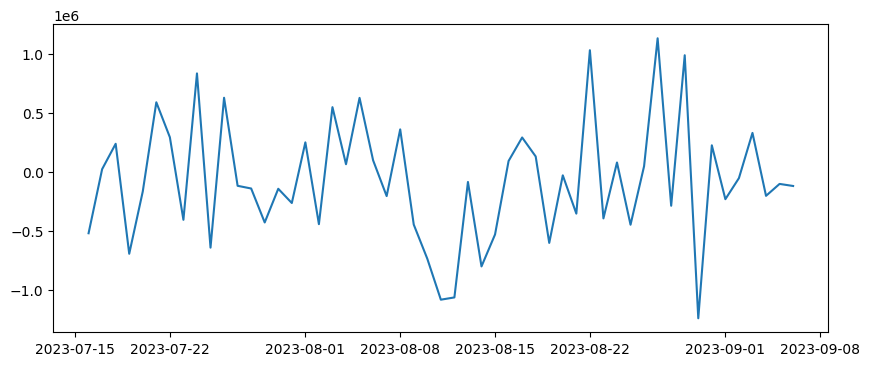

In [34]:
plt.figure(figsize=(10,4))
residuo = modelo_3.resid
plt.plot(residuo)
plt.show()

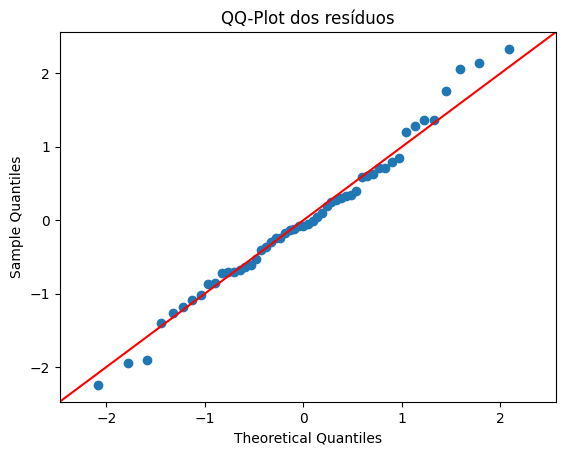

In [37]:
import statsmodels.graphics.gofplots as smg

smg.qqplot(residuo, line='45', fit=True)
plt.title('QQ-Plot dos resíduos')
plt.show()

In [ ]:
from scipy.stats import jarque_bera
print(' '*254)
test1 = jarque_bera(residuo)
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1]) # São Normais

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 0.3098498467234309
P-valor : 0.8564794766697681
